# **Rodrigo_Mesquita_DR4_TP3**
## **Inteligência Artificial: Clusterização [24E2_4]**

Link Notebook:

## 1.Gere um conjunto de dados sintéticos bidimensionais contendo seis clusters de diferentes densidades utilizando a função make_blobs do scikit-learn.

In [52]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, mean_squared_error


In [53]:
X, Y = make_blobs(n_samples=1000, centers=6, n_features=2, random_state=11)

## 2.Visualize os dados gerados em um gráfico de dispersão.

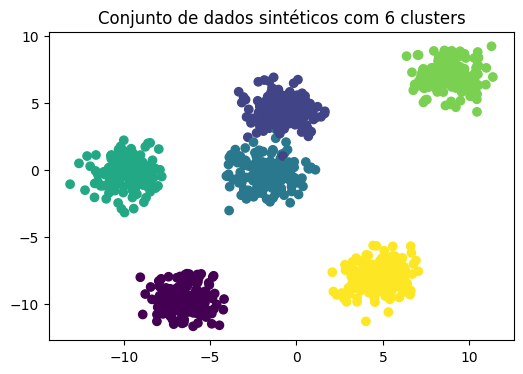

In [54]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
plt.title('Conjunto de dados sintéticos com 6 clusters')
plt.show()

## 3.Aplique o algoritmo DBSCAN aos dados gerados. Utilize a biblioteca scikit-learn e explore diferentes valores de eps e min_samples para encontrar uma boa configuração.

> #### Primeiro rodei com parâmetros aleatórios

In [55]:
def plot_scatter(X, preds):
  fig, ax = plt.subplots(figsize=(6, 4))
  mglearn.discrete_scatter(X[:, 0], X[:, 1], preds, ax=ax)
  cluster_range = list(range(preds.max() + 1))
  ax.legend(['Cluster ' + str(k) for k in cluster_range], loc='best')
  plt.show()

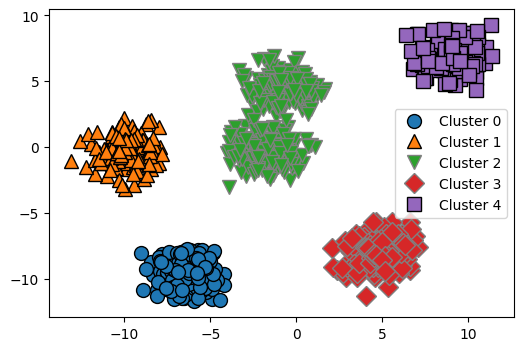

In [56]:
model = DBSCAN(eps=2., min_samples=2)
preds = model.fit_predict(X)
plot_scatter(X, preds)

> #### Em seguida realizei um gridsearch e tentei avaliar pelo silhouette score

In [57]:
eps = [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.5, 2.0]
min_samples = [2, 3, 4, 5, 6]
results = {'eps': [], 'min_samples': [], 'silhouette_score': []}

for ep in eps:
    for ms in min_samples:
        model = DBSCAN(eps=ep, min_samples=ms)
        pred = model.fit_predict(X)
        results['eps'].append(ep)
        results['min_samples'].append(ms)
        results['silhouette_score'].append(silhouette_score(X, pred))

for i in range(len(results['eps'])):
    print(f"eps:{results['eps'][i]} | ms:{results['min_samples'][i]} | silhouette:{results['silhouette_score'][i]:.1%}")


eps:0.2 | ms:2 | silhouette:-3.1%
eps:0.2 | ms:3 | silhouette:-16.9%
eps:0.2 | ms:4 | silhouette:-33.9%
eps:0.2 | ms:5 | silhouette:-50.3%
eps:0.2 | ms:6 | silhouette:-64.4%
eps:0.4 | ms:2 | silhouette:-2.2%
eps:0.4 | ms:3 | silhouette:7.2%
eps:0.4 | ms:4 | silhouette:24.7%
eps:0.4 | ms:5 | silhouette:29.2%
eps:0.4 | ms:6 | silhouette:16.8%
eps:0.5 | ms:2 | silhouette:6.7%
eps:0.5 | ms:3 | silhouette:26.2%
eps:0.5 | ms:4 | silhouette:47.2%
eps:0.5 | ms:5 | silhouette:33.6%
eps:0.5 | ms:6 | silhouette:41.9%
eps:0.6 | ms:2 | silhouette:23.3%
eps:0.6 | ms:3 | silhouette:42.5%
eps:0.6 | ms:4 | silhouette:51.3%
eps:0.6 | ms:5 | silhouette:53.4%
eps:0.6 | ms:6 | silhouette:64.8%
eps:0.7 | ms:2 | silhouette:51.7%
eps:0.7 | ms:3 | silhouette:54.3%
eps:0.7 | ms:4 | silhouette:71.3%
eps:0.7 | ms:5 | silhouette:70.3%
eps:0.7 | ms:6 | silhouette:69.3%
eps:0.8 | ms:2 | silhouette:62.5%
eps:0.8 | ms:3 | silhouette:62.5%
eps:0.8 | ms:4 | silhouette:72.8%
eps:0.8 | ms:5 | silhouette:72.3%
eps:0.8 | ms

## 4.Plote os resultados da clusterização, destacando os diferentes clusters encontrados e os pontos identificados como ruído.

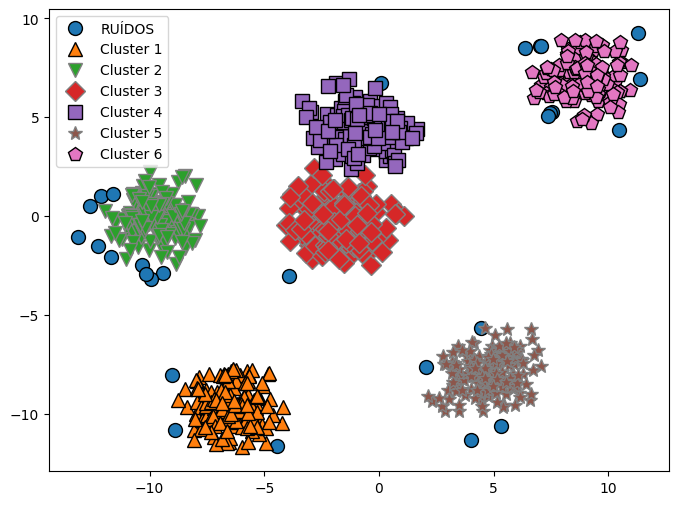

In [63]:
model = DBSCAN(eps=0.7, min_samples=4)
preds_DB = model.fit_predict(X)

fig, ax = plt.subplots(figsize=(8, 6))
mglearn.discrete_scatter(X[:, 0], X[:, 1], preds_DB, ax=ax)
clusters = ['RUÍDOS', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']

ax.legend(clusters, loc='best')
plt.show()

## 5.Explique como a escolha dos parâmetros eps e min_samples influenciou os resultados da clusterização.

> ##### Após diversas tentantivas, ficou provado que os parâmetros com melhor silhouete não eram os melhores para o problema, pois apesar de acabarem com os ruídos, acabavam juntando os dois clusters centrais em um só. 

> ##### Isso ocorreu pois a distância dos ruídos em relação a seus clusters é maior que a distância entre os clusters 3(vermelho) e 4(roxo), então se aumentar o epsilon ambos clusters viravam um só.

> #### Ao reduzir o valor de min_samples, ruídos próximos entre sí começaram a formar clusters próprios, porém, ao tentar aumentar o valor de min_samples a quantidade de ruídos nas bordas dos clusters também aumentou.

## 6.Utilize a métrica ARI para verificar o desempenho do algoritmo DBSCAN e compare com KMeans e clusterização aglomerativa e faça um plot comparativo.

In [59]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [65]:
#Métrica ARI DBSCAN
ari_DB = adjusted_rand_score(Y, preds_DB)

#Métrica ARI AgglomerativeClustering (Ward)
model = AgglomerativeClustering(n_clusters=6, linkage='ward')
preds_AC = model.fit_predict(X)
ari_AC = adjusted_rand_score(Y, preds_AC)

#Métrica ARI Kmeans
model = KMeans(n_clusters= 6, max_iter=1000,n_init=1, random_state=42)
preds_KM = model.fit_predict(X)
ari_KM = adjusted_rand_score(Y, preds_KM)

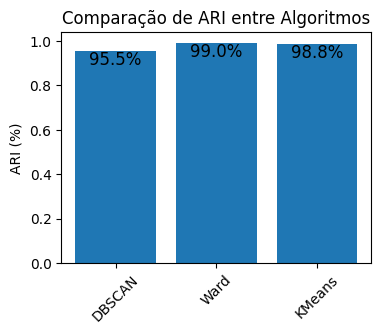

In [83]:
#Plotando a comparação dos resultados
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(['DBSCAN', 'Ward', 'KMeans'], 
       [ari_DB, ari_AC, ari_KM])

plt.xticks(rotation=45)
ax.set_ylabel('ARI (%)')
ax.set_title('Comparação de ARI entre Algoritmos')

# Adicionando os labels das barras
for i, v in enumerate([ari_DB, ari_AC, ari_KM]):
    ax.text(i, v, f"{v:.1%}", ha='center', va='top', fontsize=12)